# Lab Session: Clustering algorithms for Image Segmentation

Author: Jesús Cid Sueiro
Jan. 2017

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

## 1. Introduction

In this notebook we explore an application of clustering algorithms to shape segmentation from binary images. We will carry out some exploratory work with a small set of images provided with this notebook. Most of them are not binary images, so we must do some preliminary work to extract he binary shape images and apply the clustering algorithms to them. We will have the opportunity to test the differences between $k$-means and spectral clustering in this problem.

### 1.1. Load Image

Several images are provided with this notebook:

* BinarySeeds.png
* birds.jpg
* blood_frog_1.jpg
* cKyDP.jpg
* Matricula.jpg
* Matricula2.jpg
* Seeds.png

Select and visualize image `birds.jpg` from file and plot it in grayscale

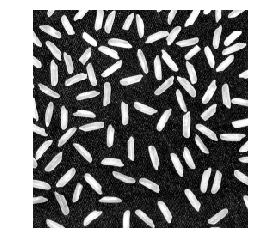

In [2]:
name = "birds.jpg"
name = "Seeds.jpg"

birds = imread("Images/" + name)
birdsG = np.sum(birds, axis=2)

# <SOL>
plt.imshow(birdsG, cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')
plt.show()
# </SOL>


### 2. Thresholding

Select an intensity threshold by manual inspection of the image histogram

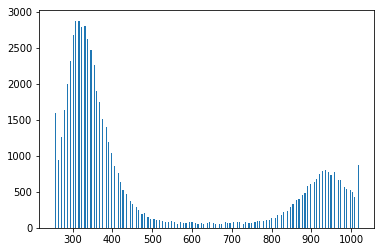

In [20]:
# <SOL>
plt.hist(birdsG.ravel(), bins=256)  
plt.show()
# </SOL>


Plot the binary image after thresholding.

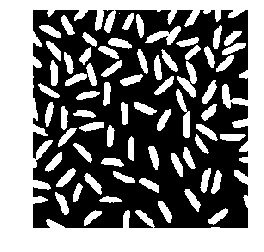

In [21]:
# <SOL>
if name == "birds.jpg":
    th = 256
elif name == "Seeds.jpg":
    th = 650

birdsBN = birdsG > th

# If there are more white than black pixels, reverse the image
if np.sum(birdsBN) > float(np.prod(birdsBN.shape)/2):
    birdsBN = 1-birdsBN
plt.imshow(birdsBN, cmap=plt.get_cmap('gray'))
plt.grid(False)
plt.axis('off')
plt.show()
# </SOL>


### 3. Dataset generation

Extract pixel coordinates dataset from image and plot them in a scatter plot.

In [29]:
# <SOL>
(h, w) = birdsBN.shape
bW = birdsBN * range(w)
bH = birdsBN * np.array(range(h))[:,np.newaxis]
pSet = [t for t in zip(bW.ravel(), bH.ravel()) if t!=(0,0)]
X = np.array(pSet)
# </SOL>

[[ 17   0]
 [ 18   0]
 [ 19   0]
 ..., 
 [214 253]
 [215 253]
 [216 253]]


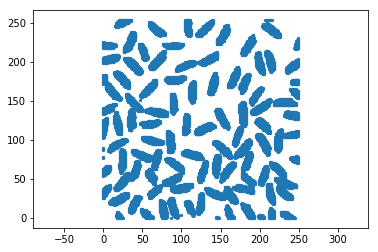

In [28]:
print X
plt.scatter(X[:, 0], X[:, 1], s=5);
plt.axis('equal')
plt.show()

### 4. k-means clustering algorithm



Use the pixel coordinates as the input data for a k-means algorithm. Plot the result of the clustering by means of a scatter plot, showing each cluster with a different colour.

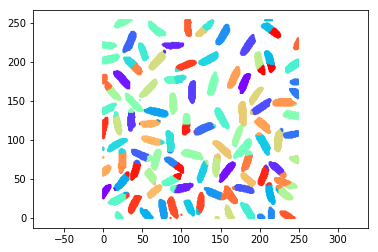

In [34]:
from sklearn.cluster import KMeans

# <SOL>
est = KMeans(100)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='rainbow',
            linewidth=0.0)
plt.axis('equal')
plt.show()
# </SOL>


### 5. Spectral clustering algorithm

#### 5.1. Affinity matrix

Compute and visualize the affinity matrix for the given dataset, using a rbf kernel with $\gamma=5$.

In [15]:
from sklearn.metrics.pairwise import rbf_kernel

# <SOL>
gamma = 5
sf = 4
Xsub = X[0::sf]
print Xsub.shape

gamma = 0.001
K = rbf_kernel(Xsub, Xsub, gamma=gamma)
# </SOL>

(4206, 2)


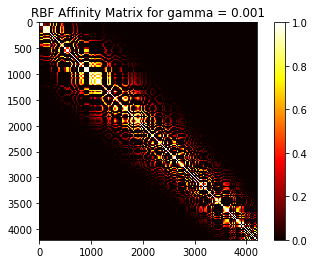

In [31]:
# Visualization
# <SOL>
plt.imshow(K, cmap='hot')
plt.colorbar()
plt.title('RBF Affinity Matrix for gamma = ' + str(gamma))
plt.grid('off')
plt.show()
# </SOL>

### 5.2. Spectral clusering

Apply the spectral clustering algorithm, and show the clustering results using a scatter plot.

In [32]:
# <SOL>
from sklearn.cluster import SpectralClustering

spc = SpectralClustering(n_clusters=100, gamma=gamma, affinity='rbf')
y_kmeans = spc.fit_predict(Xsub)
# </SOL>

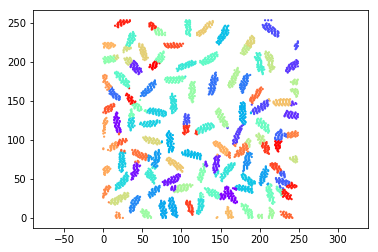

In [33]:
plt.scatter(Xsub[:,0], Xsub[:,1], c=y_kmeans, s=5, cmap='rainbow', linewidth=0.0)
plt.axis('equal')
plt.show()

Try now with other images in the dataset. You will need to re-adjust some free parameters to get a better performance.